In [1]:
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np

# A. Load data 

In [74]:
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np

import tensorflow
import time 
import warnings 
import numpy as np 
from numpy import newaxis 
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM 
from keras.models import Sequential 
from sklearn.preprocessing import MinMaxScaler


warnings.filterwarnings("ignore")

def load_data(filename, seq_len, normalise_window):
    f = pd.read_csv(filename)

    feature_col = [col for col in f.columns if col != "AQI"]
    label_col = ["AQI"]

    data = f[feature_col + label_col]
    
    scaler = MinMaxScaler(feature_range=(0, 1))


    row = round(0.8*data.shape[0])
    train = data.iloc[:row, :]
    train = scaler.fit_transform(train)
    
    np.random.shuffle(train)
    train = np.array(train)
    x_train = train[:row, :-1]
    y_train = train[:row, -1]
    
    test = data.iloc[row:, :]
    test = scaler.transform(test)
    test = np.array(test)
    x_test = test[:, :-1]
    
    y_test = test[:, -1]
    
    x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
    x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
    

    return [x_train, y_train, x_test, y_test]

def build_model(layers):
    model = Sequential()
    
    model.add(LSTM(4, input_shape=(1, 38), return_sequences = True))
    model.add(Dropout(0.2))

    model.add(LSTM(4, return_sequences = False))
    model.add(Dropout(0.2))

    model.add(Dense(output_dim = layers[3]))

    model.add(Activation("linear"))


    start  = time.time()
    model.compile(loss = "mse", optimizer = "rmsprop")
    print("Compilation Time", time.time() - start)

    return model

---> Loading data .... 
(386, 1, 38)
---> Data Loaded. Compiling ....
Compilation Time 0.019520044326782227
Train on 366 samples, validate on 20 samples
Epoch 1/100
366/366 [==============================] - 9s 23ms/step - loss: 0.0844 - val_loss: 0.0641
Epoch 2/100
366/366 [==============================] - 0s 473us/step - loss: 0.0581 - val_loss: 0.0417
Epoch 3/100
366/366 [==============================] - 0s 513us/step - loss: 0.0404 - val_loss: 0.0264
Epoch 4/100
366/366 [==============================] - 0s 499us/step - loss: 0.0321 - val_loss: 0.0203
Epoch 5/100
366/366 [==============================] - 0s 568us/step - loss: 0.0259 - val_loss: 0.0190
Epoch 6/100
366/366 [==============================] - 0s 513us/step - loss: 0.0250 - val_loss: 0.0186
Epoch 7/100
366/366 [==============================] - 0s 514us/step - loss: 0.0253 - val_loss: 0.0184
Epoch 8/100
366/366 [==============================] - 0s 557us/step - loss: 0.0247 - val_loss: 0.0183
Epoch 9/100
366/366 [===

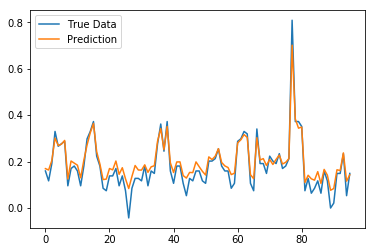

In [75]:

import time
import math
import matplotlib.pyplot as plt

def predict_point_by_point(model, data):
    print('[Model] Predicting Point-by-Point...')
    predicted = model.predict(data)
    predicted = np.reshape(predicted, (predicted.size,))
    return predicted


def plot_results(predicted_data, true_data):
    fig = plt.figure(facecolor='white')
    ax = fig.add_subplot(111)
    ax.plot(true_data, label='True Data')
    plt.plot(predicted_data, label='Prediction')
    plt.legend()
    plt.show()


if __name__ =='__main__':
    global_time = time.time()
    epochs = 100
    seq_len = 38

    print('---> Loading data .... ')

    X_train, y_train, X_test, y_test = load_data("/data_air/Baldwin_Alabama_features.csv", seq_len, True)
    print(X_train.shape)

    print('---> Data Loaded. Compiling ....')

    model = build_model([1, 38, 100, 1])

    model.fit(
        X_train, 
        y_train,
        batch_size = 16, 
        nb_epoch = epochs,
        validation_split = 0.05
        )

    predictions = predict_point_by_point(model, X_test)
    plot_results(predictions, y_test)
